In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import random

%matplotlib inline

In [2]:
X = np.array([[]])

for person_num in range(1, 11):
   for img_num in range(1, 65):
      img_name = f'./faces/person{str(person_num).zfill(2)}_{str(img_num).zfill(2)}.png'
      # Read image
      img=mpimg.imread(img_name)
      # Reshape image
      fimg = np.reshape(img, 50*50)
      if X.shape[1] == 0:
         X = np.array([fimg.T])
      else:
         X = np.vstack((X, fimg))

In [3]:
mu = np.mean(X, axis=0)

zero_center = lambda X_i: X_i - mu.T
X = np.apply_along_axis(zero_center, 1, X)

In [4]:
# SVD
u, s, vh = np.linalg.svd(X, full_matrices=False)

In [85]:
k_pca = 0
for k in range(0, s.shape[0]):
   sq = lambda sigma_i: sigma_i * sigma_i
   pca_percent = np.sum(np.vectorize(sq)(s[:k+1,])) / np.sum(np.vectorize(sq)(s))
   if pca_percent > 0.99:
      k_pca = k + 1
      break

print(k_pca)

163


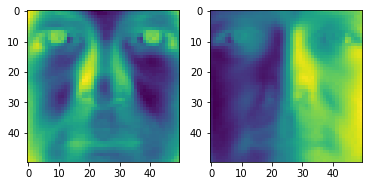

In [86]:
# Show two images
f = plt.figure()
f.add_subplot(1,2, 1)
imgplot = plt.imshow(np.reshape(vh[0].T, (50, 50)))
f.add_subplot(1,2, 2)
imgplot = plt.imshow(np.reshape(vh[1].T, (50, 50)))

In [91]:
i = random.randint(0, 640)
x = X[i,:]

w = np.dot(x, vh[:k_pca].T)
w_prime = np.dot(w, vh[:k_pca])

x_prime = w_prime + mu

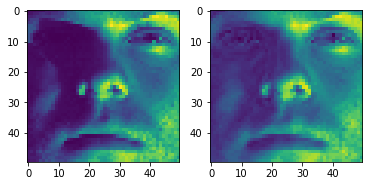

In [92]:
# Show two images
f = plt.figure()
f.add_subplot(1,2, 1)
imgplot = plt.imshow(np.reshape(X[i,:] + mu.T, (50, 50)))
f.add_subplot(1,2, 2)
imgplot = plt.imshow(np.reshape(x_prime, (50, 50)))